<a href="https://colab.research.google.com/github/santosh4568/Potato-Diseases-Detection/blob/main/Potato_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Training/PlantVillage" , shuffle=True , image_size =(IMAGE_SIZE,IMAGE_SIZE) , batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_name = dataset.class_names

In [5]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

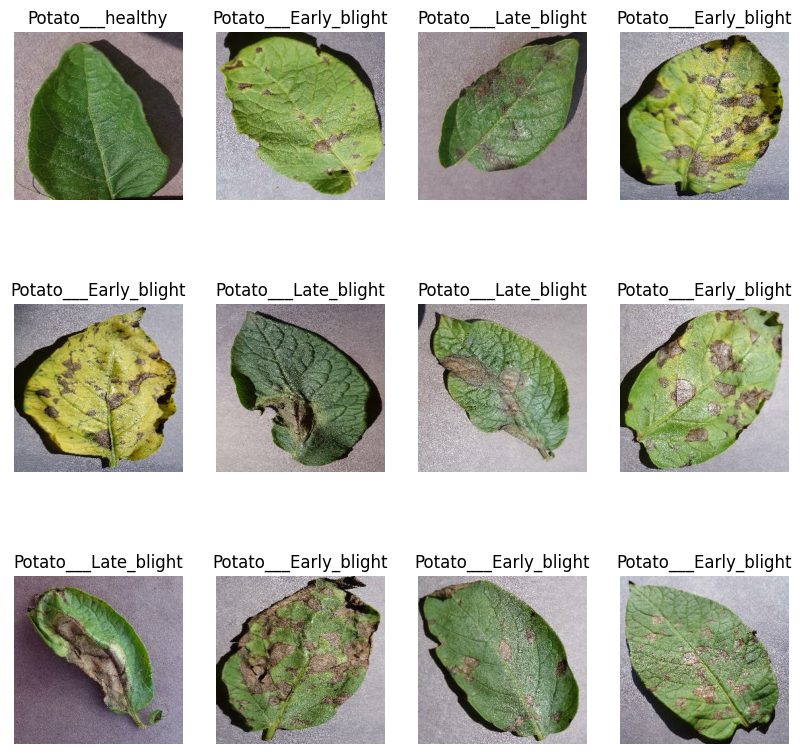

In [6]:
plt.figure(figsize = (10,10))
for batch_size , label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(batch_size[i].numpy().astype("uint8"))
    plt.title(class_name[label_batch[i]])
    plt.axis("off")

In [12]:
def get_dataset_partition(dst , train_splt = 0.8 , val_splt=0.1 , test_splt=0.1 , shuffle=True , shuffle_size = 1000):
  dst_size = len(dst)

  if shuffle:
    dst = dst.shuffle(shuffle_size , seed = 12)
  train_size = int(train_splt*dst_size)
  val_size = int(val_splt*dst_size)

  train_dst = dst.take(train_size)
  val_dst = dst.skip(train_size).take(val_size)
  test_dst = dst.skip(train_size).skip(val_size)

  return train_dst , val_dst , test_dst


In [21]:
train , validate , test = get_dataset_partition(dataset)

In [22]:
len(train)

54

In [23]:
len(validate)

6

In [24]:
len(test)

8